---
## 步骤0：导入数据集

In [24]:
# 导入 pickle 库
import pickle

# TODO: 在下面填写你下载的训练集、验证集和测试集的地址

training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### 使用 Python、NumPy 或 Pandas 计算数据集的基本属性

In [11]:
### 将每个问号改为计算代码

# TODO: 训练集的样本数
n_train = len(X_train)

# TODO: 验证集的样本数
n_validation = len(X_valid)

# TODO: 测试集的样本数
n_test = len(X_test)

# TODO: 交通标志的图片尺寸
image_shape = X_train[0].shape

# TODO: 数据集的类别数量
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 数据集探索可视化

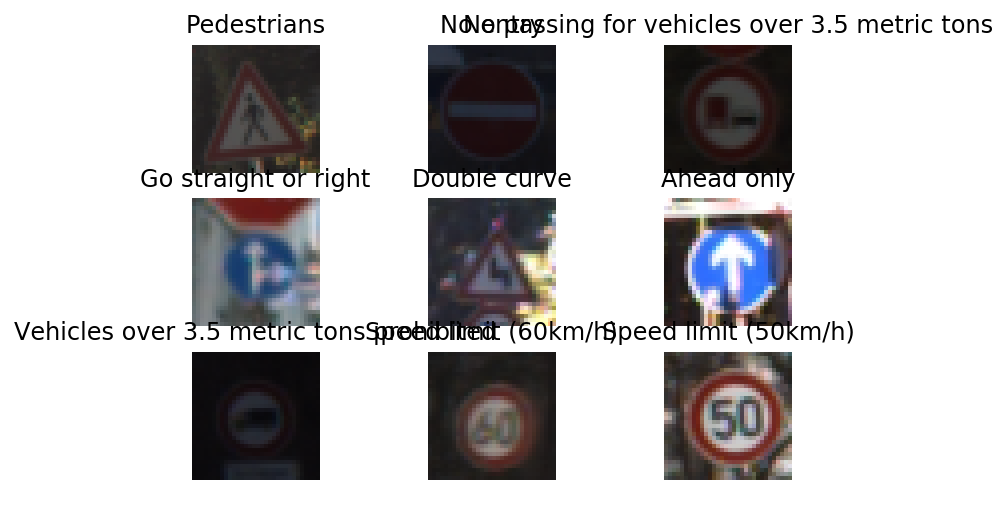

In [12]:
### 数据集探索可视化
### 如果觉得不够，你可以自由添加代码块
import matplotlib.pyplot as plt
# 添加下面这句代码，可以让可视化图片直接显示在 notebook 里。
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TODO: 对数据集进行探索可视化
import pandas as pd
import random
signnames = pd.read_csv('signnames.csv')

for i in range(9):
    index=random.randint(0,len(X_train))
    plt.subplot(3,3,i+1)
    signname=signnames["SignName"][y_train[index]]
    plt.title(signname)
    plt.imshow(X_train[index])
    plt.axis('off')

### 数据集预处理（比如标准化，归一化，转为灰度图等方法）

至少应该对图像数据进行标准化操作，也就是使数据的平均值为0，方差为1。不过对于图像数据来说，`(pixel-128)/128` 是一种更方便的近似算法，我们可以在本项目中使用该算法。

其他的预处理步骤是可选的，你可以尝试不同的预处理方法，看是否能够提高模型的性能。

In [26]:
### 在这里写预处理的代码。要求对数据进行标准化/归一化操作，
### 当然你也可以进行其他预处理操作，比如转为灰度等。
### 你可以自由添加代码块
# TODO: 对数据集进行预处理
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def data_process(data):
    # this process include image normalization amd grayscale
    # data's shape is (num_image, 32, 32, 3)
    new_data=[]
    for img in data:
        gray_img = rgb2gray(img)
        norm_img=(gray_img-128)/128
        new_data.append(norm_img)
    return np.array(new_data).reshape((len(new_data), 32, 32, 1))

X_train=data_process(X_train)
X_valid=data_process(X_valid)
X_test=data_process(X_test)

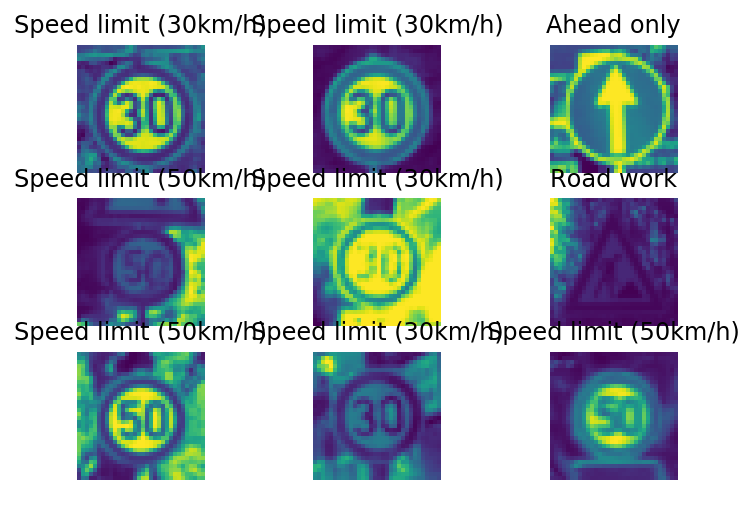

In [14]:
for i in range(9):
    index=random.randint(0,len(X_valid))
    plt.subplot(3,3,i+1)
    signname=signnames["SignName"][y_valid[index]]
    plt.title(signname)
    plt.imshow(X_valid[index][:,:,0])
    plt.axis('off')

In [15]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)